In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Getting the data into a dataframe and taking a first look
dataset = pd.read_csv('/content/dataset.csv')
dataset.head()

,ISS,NISS,PS14,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,...,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3,Label
0,11,11,97.21493,41,26.16,21.95,1.60,2.58,0.10,83.9,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.6876,N
1,9,22,99.59795,22,8.28,4.21,3.53,0.33,0.04,50.9,...,33.0,237.32,75.04,66.47,59.20,88.73,2.89,39.96,133.6386,Y
2,14,17,99.10462,47,9.24,4.52,3.73,0.45,0.16,49.0,...,NaN,179.18,34.76,58.45,171.43,84.37,0.01,85.15,181.1892,N
3,4,12,99.85114,38,11.54,6.37,4.18,0.65,0.09,55.2,...,38.0,1643.40,1353.66,193.49,2100.26,292.98,646.47,1267.07,194.7159,N
4,24,34,87.32603,78,17.43,12.48,3.46,1.10,0.38,71.7,...,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.6209,Y


<Axes: >

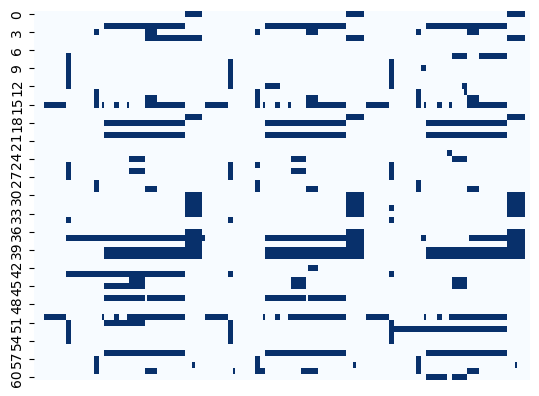

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')


In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

<Axes: >

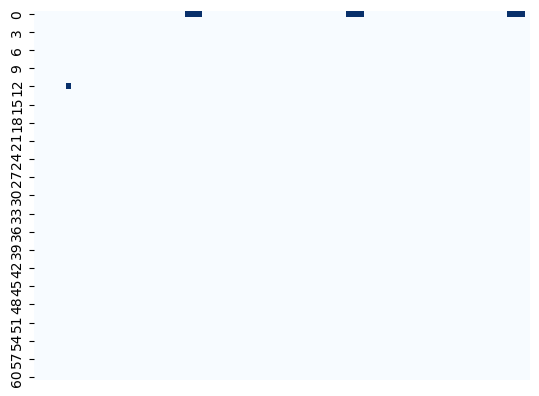

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

<Axes: >

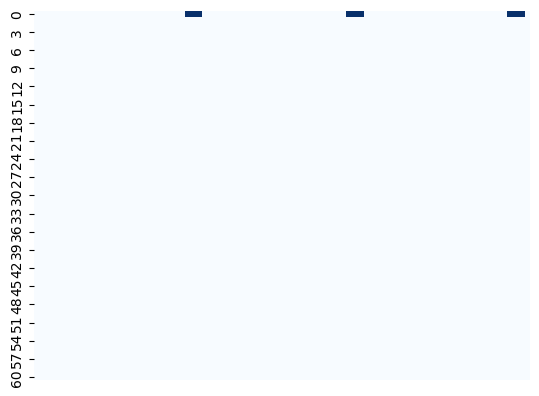

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
dataset.corr()


<ipython-input-13-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,ISS,NISS,PS14,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,...,Central_Mem_Cyto_T3,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3
ISS,1.000000,0.855675,-0.632592,-0.065244,0.143855,0.166888,0.016227,-0.003453,0.183326,0.145350,...,-0.172194,0.020874,0.153687,0.223056,0.167675,-0.210735,0.178040,0.086637,-0.158937,-0.045731
NISS,0.855675,1.000000,-0.664651,0.021261,-0.006323,0.013729,-0.008749,-0.088828,0.056353,0.075052,...,-0.174210,0.165386,0.042004,0.068507,0.112227,-0.197461,0.084710,-0.025465,-0.191560,0.042810
PS14,-0.632592,-0.664651,1.000000,-0.190936,-0.024382,-0.073216,0.067170,0.061203,-0.145410,-0.167183,...,-0.011355,-0.013946,-0.106031,0.067246,-0.220096,0.109050,-0.017950,-0.034688,0.052677,-0.165992
Age,-0.065244,0.021261,-0.190936,1.000000,-0.218165,-0.225898,-0.051386,-0.085540,-0.202138,-0.111746,...,0.220223,0.128680,-0.082518,-0.014854,-0.085558,0.129217,-0.013653,-0.024252,-0.008301,0.387383
WBC [109/L]_T1,0.143855,-0.006323,-0.024382,-0.218165,1.000000,0.919162,0.396084,0.710690,0.549498,0.470019,...,0.131395,0.005670,0.237682,0.239431,0.123390,-0.028492,0.142977,0.256657,0.109663,-0.096557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IL-10_T3,-0.210735,-0.197461,0.109050,0.129217,-0.028492,-0.003165,-0.071692,-0.026453,-0.031619,0.054369,...,0.067519,-0.104137,0.338038,0.281647,0.182422,1.000000,0.039558,0.321025,0.701654,0.136078
G-CSF_T3,0.178040,0.084710,-0.017950,-0.013653,0.142977,0.084691,0.177464,0.142719,0.050171,-0.034146,...,-0.085792,0.356527,0.178337,0.713808,0.196154,0.039558,1.000000,0.299583,0.062959,0.000144
MCP-1_T3,0.086637,-0.025465,-0.034688,-0.024252,0.256657,0.229155,0.165344,0.154155,0.232530,0.071130,...,-0.101677,0.024539,0.179208,0.474126,0.117602,0.321025,0.299583,1.000000,0.771038,0.044176
TNF-A_T3,-0.158937,-0.191560,0.052677,-0.008301,0.109663,0.127343,-0.005315,0.103891,0.122127,0.113018,...,0.012499,-0.120328,0.258113,0.224110,0.141039,0.701654,0.062959,0.771038,1.000000,0.080013


In [ ]:
dataset.fillna(0,inplace = True)

In [ ]:
dataset.isnull().sum()

ISS                    0
NISS                   0
PS14                   0
Age                    0
WBC [109/L]_T1         0
                      ..
G-CSF_T3               0
MCP-1_T3               0
TNF-A_T3               0
Cortisol (ng/ml)_T3    0
Label                  0
Length: 197, dtype: int64

In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

<Axes: >

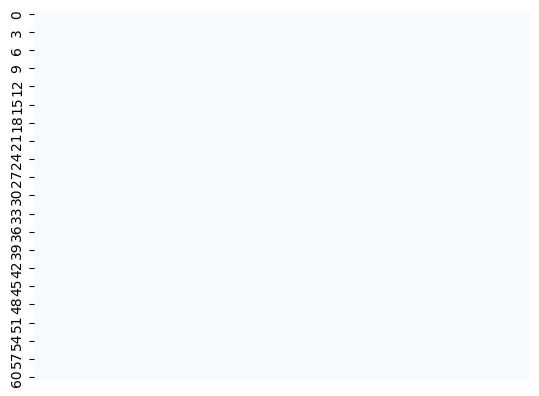

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

#Training of the First Model


In [ ]:
# Separate the training data from the target data
X = dataset.iloc[:, 0:-1]
y = dataset.loc[:, 'Label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4 ,random_state= 0)

# Training the logistic regression model
logreg = LogisticRegression(max_iter = 2500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

#Done with the Training part

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred = logreg.predict(X_test)
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))


Test accuracy: 0.64


A baseline accuracy of 64% was achieved, let's see if that score can be improved upon by using other methods.

We'll use Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100,125,150,175,200,250,300,350,400,450,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
import warnings
warnings.filterwarnings('ignore')

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 175, 200, 250, 300,
                                          350, 400, 450, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
rfc=RandomForestClassifier(criterion = 'entropy',
 max_depth = 4,
 max_features = 'log2',
 n_estimators = 125,
random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=125, random_state=42)

In [ ]:
pred_f = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_f))

              precision    recall  f1-score   support

           N       1.00      0.50      0.67        10
           Y       0.75      1.00      0.86        15

    accuracy                           0.80        25
   macro avg       0.88      0.75      0.76        25
weighted avg       0.85      0.80      0.78        25

